# Lecture 12: Bandwidth-Efficient AM

EE-40453, Digital Radio Communications, Spring 2020

J. Nicholas Laneman, Bertrand Hochwald, & Jonathan Chisum<br>
Wireless Institute & Department of Electrical Engineering<br>
University of Notre Dame

Copyright 2020, All Rights Reserved

## Summary

In this lecture, we will see how we can remove redundacies in AM modulation and demodulation processes.

## Outline

* Single Sideband

* Quadrature Multiplexing

## Single Sideband (SSB) AM Modulation

### Motivation: Redundancy in the Sidebands for DSB-SC

For DSB-SC, we have

$$s(t) = m(t)\cos(2\pi f_c t) \leftrightarrow S(f)=\frac{1}{2}[M(f-f_c) + M(f+f_c)]$$

<img src="images/01.png" width="80%">

From this illustration, we see that each "sideband" is copied twice. Is that necessary?

Can we instead recover from the following modulated signals?

<img src="images/02.png" width="80%">

Note that these alternative modulated signals have passband bandwidth $B$ instead of $2B$ for DSC-SC!

If we carefully consider on DSC-SC demodulator, we see that it can be used to recover the message signal.

<img src="images/03.png" width="80%">

### Analytic Signal Representation of SSB

Let

$$\begin{align}
M_{+}(f) &:= M(f)u(f) \\
M_{-}(f) &:= M(f)u(-f)
\end{align}$$

where we define

$$u(f):=
\begin{cases}
1 & f > 0 \\
\frac{1}{2} & f=0 \\
0 & f < 0
\end{cases}$$

Then $M(f) = M_{+}(f) + M_{-}(f)$.

Furthermore, if $m(t)$ is real-valued, we have $M_{+}(f)=M_{-}^*(-f)$ for $f\ge 0$, so it is clear that $M_{+}(f)$ (or $M_{-}(f)$) completely specifies $M(f)$.

The signal $M_{+}(f)$ is called an *analytic signal* that consists of only positive frequencies, and therefore $M_{+}(f)$ provides the *analytic signal representation* of $M(f)$.

Now
$$\begin{align}
S_\mathrm{USB}(f) &= M_{+}(f-f_c) + M_{-}(f+f_c) \\
S_\mathrm{LSB}(f) &= M_{-}(f-f_c) + M_{+}(f+f_c)
\end{align}$$


The signal $S_{\mathrm{USB}}(f)$ is called the *upper sideband (USB) representation* of $M(f)$, while $S_{\mathrm{LSB}}(f)$ is called the *lower sideband (LSB) representation* of $m(t)$. Both representations are called *single sideband (SSB)* representations of $M(f)$.

**EXERCISE:** Verify that there are no other real-valued SSB representations of a real signal.

Although intuitive in the frequency domain, the SSB representations are not particularly insightful in the time domain. In particular, the filter $u(f)$ is not realizable and needs to be approximated at the origin.

### The Hilbert Transform

Consider the LTI frequency response


$$H(f):=-j\mathrm{sgn}(f)=\begin{cases}
e^{-j\pi/2} & f > 0 \\
0 & f=0 \\
e^{+j\pi/2} & f < 0
\end{cases} \leftrightarrow h(t)=\frac{1}{\pi t}$$

**TBD: Insert diagram of magnitude and phase responses**

**Example**

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt 
from scipy import fftpack

In [2]:
# h(t)
def h(t):
    return 1/np.pi/t
ht_name = r'$h(t)=\frac{1}{\pi t}$'

# using 101 steps results in in array including the value 0
t=np.linspace(-10,10,101)

# h(0) = nan -> a nan value creates a gap
y=h(t)

# digital filter
N = 60
b = [2*np.sin(np.pi*n/2)**2/(np.pi*n) for n in range(1, N+1)]
b = np.append(-1*np.flip(b, 0), np.append([0], b))*np.hamming(2*N+1)
w, h = signal.freqz(b)
h = h*np.exp(1j*w*N)


D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


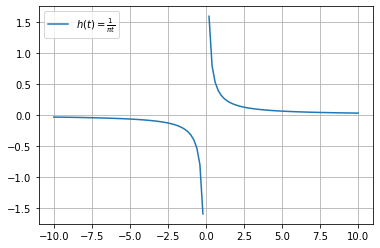

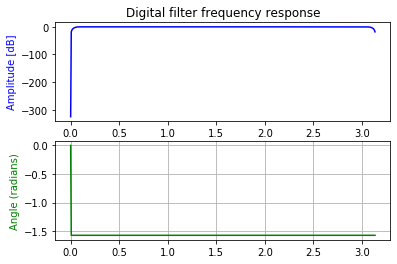

In [4]:
plt.plot(t, y, label=ht_name)
plt.legend(loc='upper left')
plt.grid()
plt.show()


fig = plt.figure()
plt.subplot(211)
plt.title('Digital filter frequency response') 
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.subplot(212)
angles = np.angle(h)
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

**Defintion:** The *Hilbert Trasnsform* $x_h(t) \leftrightarrow X_h(f)$ of a signal $x(t) \leftrightarrow X(f)$ is the output of the LTI system with frequency respopnse $H(f)=-j\mathrm{sgn}(f)$ if $x(t)$ is the input.

That is,

$$X_h(f) = -j\mathrm{sgn}(f)X(f) \leftrightarrow x_h(t) = \int_{-\infty}^{+\infty} \frac{x(\tau)}{\pi(t-\tau)} d\tau$$

**Example:** The Hilbert Transform of $\cos(2\pi f_c t)$ is $-\sin(2\pi f_c t)$

**Example:** The analytic signal $X_{+}(f)$ can be written in terms of the Hilbert Transform as follows

$$X_{+}(f) = \frac{1}{2}\left[X(f) + j X_h(f) \right]$$

Similarly,

$$X_{-}(f) = \frac{1}{2}\left[X(f) - j X_h(f) \right]$$

### Hilbert Transform Representation of SSB

Applying the example above to $S_{\mathrm{USB}}(f)$, we have

$$\begin{align}
S_{\mathrm{USB}}(f) &= M_{+}(f-f_c) + M_{-}(f+f_c) \\
&= \frac{1}{2}\left[M(f-f_c)+jM_h(f-f_c) \right] + \frac{1}{2}\left[M(f+f_c)-jM_h(f+f_c) \right] \\
&= \frac{1}{2}\left[M(f-f_c)+M(f+f_c) \right] - \frac{1}{2j}\left[M_h(f-f_c)-M_h(f+f_c) \right]
\end{align}$$

so that
$$s_\mathrm{USB}(t) = m(t)\cos(2\pi f_c t) - m_h(t)\sin(2\pi f_c t)$$

Similary, we have
$$\begin{align}
S_{\mathrm{LSB}}(f) &= M_{-}(f-f_c) + M_{+}(f+f_c) \\
&= \frac{1}{2}\left[M(f-f_c)-jM_h(f-f_c) \right] + \frac{1}{2}\left[M(f+f_c)+jM_h(f+f_c) \right] \\
&= \frac{1}{2}\left[M(f-f_c)+M(f+f_c) \right] + \frac{1}{2j}\left[M_h(f-f_c)-M_h(f+f_c) \right]
\end{align}$$

so that
$$s_\mathrm{LSB}(t) = m(t)\cos(2\pi f_c t) + m_h(t)\sin(2\pi f_c t)$$

The take away is that, by modulating the right signal onto the sine of the same frequency as the cosine carrier signal, we elimninate the redundancy sidebands.

**Example**

In [52]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt 
from scipy import fftpack

In [202]:
# m(t) = sin(2*pi*f*t)
f0 = 1e3
T = 1/f0
N = int(1e6)
fs = 1e6
Ts = 1/fs
n = np.arange(N,dtype=int)
t2 = n/fs
mt = np.sin(2*np.pi*f0/fs*n)
mf = fftpack.fftshift(fftpack.fft(mt))
freq = np.linspace(-1/2, 1/2, num = N)


fc = 1e4
st = mt*np.cos(2*np.pi*fc/fs*n)
sf = fftpack.fftshift(fftpack.fft(st))

# Hilbert transform 
hmt = -np.cos(2*np.pi*f0/fs*n)
# USB
susbt = mt*np.cos(2*np.pi*fc/fs*n) - hmt *np.sin(2*np.pi*fc/fs*n)
susbf = fftpack.fftshift(fftpack.fft(susbt))


slsbt = mt*np.cos(2*np.pi*fc/fs*n) + hmt *np.sin(2*np.pi*fc/fs*n)
slsbf = fftpack.fftshift(fftpack.fft(slsbt))




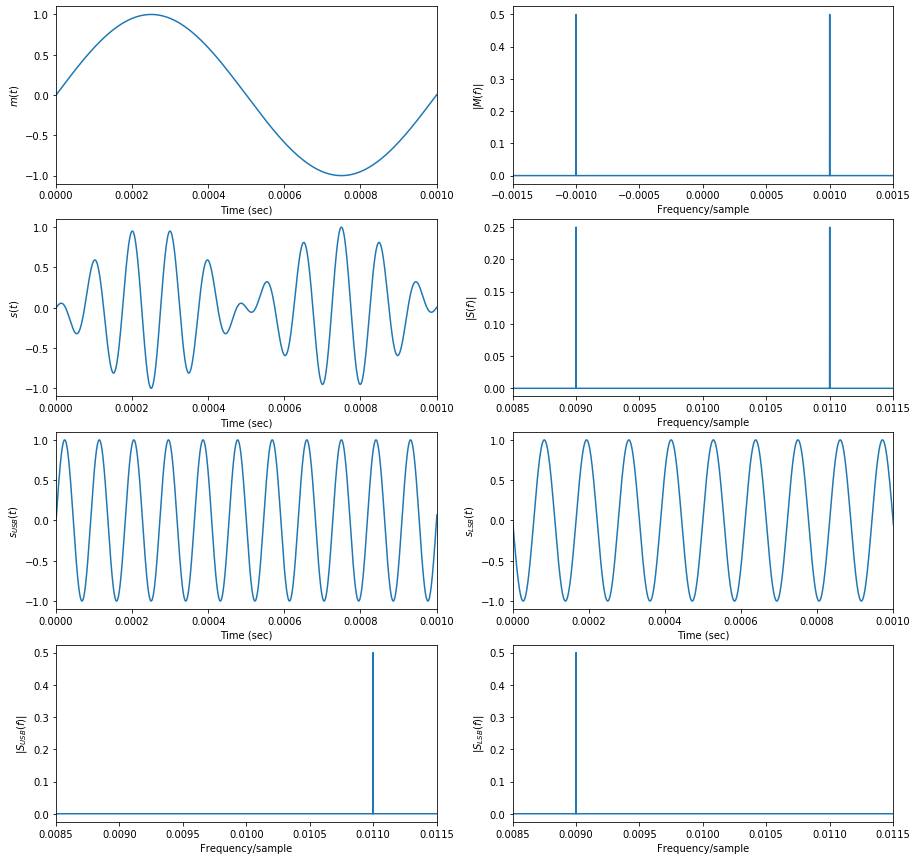

In [203]:

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(15)

plt.subplot(421)
plt.plot(t2, mt)
plt.xlabel("Time (sec)")
plt.ylabel("$m(t)$")
plt.xlim(0,1/f0)

plt.subplot(422)
plt.plot(freq,abs(mf)/N,'-')
plt.ylabel("$|M(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim(-1.5*f0/fs,1.5*f0/fs)

plt.subplot(423)
plt.plot(t2, st)
plt.xlabel("Time (sec)")
plt.ylabel("$s(t)$")
plt.xlim(0,1/f0)

plt.subplot(424)
plt.plot(freq,(abs(sf)/N),'-')
plt.ylabel("$|S(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim(fc/fs-1.5*f0/fs,fc/fs+1.5*f0/fs)

plt.subplot(425)
plt.plot(t2, (susbt))
plt.xlabel("Time (sec)")
plt.ylabel("$s_{USB}(t)$")
plt.xlim(0,1/f0)

plt.subplot(426)
plt.plot(t2, (slsbt))
plt.xlabel("Time (sec)")
plt.ylabel("$s_{LSB}(t)$")
plt.xlim(0,1/f0)


plt.subplot(427)
plt.plot(freq,(abs(susbf)/N),'-')
plt.ylabel("$|S_{USB}(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim(fc/fs-1.5*f0/fs,fc/fs+1.5*f0/fs)



plt.subplot(428)
plt.plot(freq,(abs(slsbf)/N),'-')
plt.ylabel("$|S_{LSB}(f)|$")
plt.xlabel("Frequency/sample")
plt.xlim(fc/fs-1.5*f0/fs,fc/fs+1.5*f0/fs)
plt.show()


**Example**

A single-sideband modulation system with carrier frequency $f_c$, is shown below. 

<img src="images/06.png" width="60%">

Sketch the Fourier transform of $s_1(t), s_2(t), s_3(t), s_4(t), s_5(t), s_6(t)$, and $y(t)$, thus
showing that $y(t)$ is $x(t)$ single-sideband-modulated on the carrier $f_c$. Assume that
$x(t)$ has the real Fourier transform and that $H(f)$ is a lowpass filter as shown below.

<!--
    Source: https://ocw.mit.edu/resources/res-6-007-signals-and-systems-spring-2011/index.htm Problem 13.6
-->


<img src="images/07.png" width="60%">

Solution:
<img src="images/08.png" width="60%">


## Quadrature

With sine carrier signal also available to us, we can also consider mdulating two separate baseband signals. This technique is called *quadrature multiplexing (QM)*.

### Quadrature Multiplexing

Specifically, let $m(t)=m_{R}(t)+jm_{I}(t)$, where $m_{R}(t)$ and $m_{I}(t)$ are two baseband signals bandlimited to maximum frequency $B$.

Now consider

$$\begin{align}
s_{\mathrm{QM}}(t) &= \mathrm{Re}\left\{m(t)e^{j2\pi f_c t} \right\} \\
&=\mathrm{Re}\left\{(m_{R}(t)+jm_{I}(t))(\cos(2\pi f_c t)+j\sin(2\pi f_c t))\right\} \\
&= m_R(t)\cos(2\pi f_c t) - m_I(t)\sin(2\pi f_c t)
\end{align}$$

We see that we have **two** signal of baseband bandwidth $B$ now occupying the passband bandwidth of $2B$ for $s_{\mathrm{QM}}(t)$.

<img src="images/04.png" width="80%">

**Example** (Modeling frequency or phase offsets) 


<!--
    Source: Fundamentals of Digital Communication, Example 2.2.2, Upamanyu Madhow
-->


Consider a complex baseband signal $m(t) = m_R(t) + j m_I(t)$. Its corresponding passband signal is given by:
$$s_{\mathrm{QM}}(t) = m_R(t)\cos(2\pi f_c t) - m_I(t)\sin(2\pi f_c t).$$
Now, consider a phase-shifted version of the passband signal:
$$\tilde{s}_{\mathrm{QM}}(t) =  m_R(t)\cos(2\pi f_c t + \theta(t)) - m_I(t)\sin(2\pi f_c t+ \theta(t)),$$
where $\theta(t)$ may vary slowly with time. For example, a carrier frequency offset a and a phase offset b corresponds to $\theta(t) = 2\pi a t + b$. 

We wish to find the complex baseband of $\tilde{s}_{\mathrm{QM}}(t)$ with respect to $f_c$.
To do this, we rewrite $\tilde{s}_{\mathrm{QM}}(t)$ in the standard form as follows:
$$\tilde{s}_{\mathrm{QM}}(t) = \rm{Re}\left( m(t) e^{j(2\pi f_c t + \theta(t))}\right)$$

Comparing with the desired form
$$\tilde{s}_{\mathrm{QM}}(t) = \rm{Re}\left( \tilde{m}(t) e^{j(2\pi f_c t )}\right),$$
we can read off
$$\tilde{m} (t) = m(t)e^{j\theta(t)}.$$
This relates the complex baseband before and after a phase offset.

## Quadrature Demultiplexing

There are several ways to view recovery of $m(t)$ from $s_{\mathrm{QM}}(t)$.

$$s_{\mathrm{QM}}(t) = \frac{1}{2}\left[m(t)e^{j2\pi f_c t} + m^*(t) e^{-j2\pi f_c t} \right]$$

so that

$$s_{\mathrm{QM}}(t)e^{-j2\pi f_c t} = \frac{1}{2}\left[m(t)+ m^*(t) e^{-j2\pi (2f_c) t} \right]$$

The second term can be filtered out with a lowpass filter, so that we can recover $m(t)$ as shown in the figure below.

<img src="images/05.png" width="80%">

A few comments are in order:

* The cross terms $m_R(t)\sin(2\pi f_c t)\cos(2\pi f_c t)$ and $m_I(t)\cos(2\pi f_c t)\sin(2\pi f_c t)$ are eliminated via  filtering, so that there is no interference between $m_R(t)$ and $m_I(t)$.

* $m_R(t)\cos(2\pi f_c t)$ is called the *in-phase (I) component*, and $m_I(t)\sin(2\pi f_c t)$ is called the *quadrature (Q) component*